# Proyecto energía analisis bivariado

## Integrantes

- Enrique Laguna Diaz
- Hector Aaron Ramirez Obregon
- Humberto Peñuelas Almeida

## Imports

In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [3]:
path = "../DataSets/Clean_Energy.csv"
energia_df = pd.read_csv(path,sep=",",encoding="utf-8")
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [4]:
stats.ttest_ind

<function scipy.stats._stats_py.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)>

## Pruebas de hipótesis



In [5]:
energia_df['TYPE OF PRODUCER'].unique()

array(['Total Electric Power Industry',
       'Electric Generators, Electric Utilities',
       'Combined Heat and Power, Electric Power',
       'Combined Heat and Power, Commercial Power',
       'Combined Heat and Power, Industrial Power',
       'Electric Generators, Independent Power Producers'], dtype=object)

In [6]:
carbon = energia_df[energia_df['ENERGY SOURCE'] == 'Coal'].value_counts()
carbon.value_counts()
#energia_df[energia_df['ENERGY SOURCE'] == 'Coal']






1    47642
dtype: int64

In [7]:
sample1 = energia_df[energia_df['ENERGY SOURCE'] == 'Coal']
sample1

sample2 = energia_df[energia_df['ENERGY SOURCE'] == 'Petroleum']
sample2

sample3 = energia_df[energia_df['ENERGY SOURCE'] == 'Natural Gas']
sample3

sample4 = energia_df[energia_df['ENERGY SOURCE'] == 'Nuclear']
sample4

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0000
6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,18410.0000
12,2001,1,AK,"Combined Heat and Power, Electric Power",Coal,19742.0000
15,2001,1,AK,"Combined Heat and Power, Commercial Power",Coal,8751.0000
21,2001,1,AL,Total Electric Power Industry,Coal,6557913.0000
...,...,...,...,...,...,...
496743,2022,5,WV,"Electric Generators, Electric Utilities",Coal,2979573.0000
496748,2022,5,WY,Total Electric Power Industry,Coal,2149413.0000
496757,2022,5,WY,"Combined Heat and Power, Industrial Power",Coal,22823.0000
496763,2022,5,WY,"Electric Generators, Independent Power Producers",Coal,55187.0000


,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0000
7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,64883.0000
13,2001,1,AK,"Combined Heat and Power, Electric Power",Petroleum,213.0000
16,2001,1,AK,"Combined Heat and Power, Commercial Power",Petroleum,1073.0000
18,2001,1,AK,"Combined Heat and Power, Industrial Power",Petroleum,4916.0000
...,...,...,...,...,...,...
496739,2022,5,WV,"Electric Generators, Independent Power Producers",Petroleum,0.0000
496746,2022,5,WV,"Electric Generators, Electric Utilities",Petroleum,11386.0000
496753,2022,5,WY,Total Electric Power Industry,Petroleum,1813.0000
496761,2022,5,WY,"Combined Heat and Power, Industrial Power",Petroleum,1.0000


,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0000
8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,305277.0000
19,2001,1,AK,"Combined Heat and Power, Industrial Power",Natural Gas,62244.0000
23,2001,1,AL,Total Electric Power Industry,Natural Gas,566478.0000
33,2001,1,AL,"Electric Generators, Electric Utilities",Natural Gas,473253.0000
...,...,...,...,...,...,...
496745,2022,5,WV,"Electric Generators, Electric Utilities",Natural Gas,45527.0000
496750,2022,5,WY,Total Electric Power Industry,Natural Gas,146534.0000
496758,2022,5,WY,"Combined Heat and Power, Industrial Power",Natural Gas,54964.0000
496765,2022,5,WY,"Electric Generators, Independent Power Producers",Natural Gas,0.0000


,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
25,2001,1,AL,Total Electric Power Industry,Nuclear,2940300.0000
34,2001,1,AL,"Electric Generators, Electric Utilities",Nuclear,2940300.0000
55,2001,1,AR,Total Electric Power Industry,Nuclear,1028544.0000
64,2001,1,AR,"Electric Generators, Electric Utilities",Nuclear,1028544.0000
82,2001,1,AZ,Total Electric Power Industry,Nuclear,2733255.0000
...,...,...,...,...,...,...
496593,2022,5,VA,"Electric Generators, Electric Utilities",Nuclear,2693364.0000
496633,2022,5,WA,Total Electric Power Industry,Nuclear,847700.0000
496665,2022,5,WA,"Electric Generators, Electric Utilities",Nuclear,847700.0000
496676,2022,5,WI,Total Electric Power Industry,Nuclear,897835.0000


In [8]:
print("Sample 1 y 2")
stats.ttest_ind(sample1["GENERATION"],sample2["GENERATION"],random_state=4,alternative='greater')
print("Sample 1 y 3")
stats.ttest_ind(sample1["GENERATION"],sample3["GENERATION"],random_state=4,alternative='greater')


Sample 1 y 2


Ttest_indResult(statistic=54.52067660976461, pvalue=0.0)

Sample 1 y 3


Ttest_indResult(statistic=24.29993702349212, pvalue=2.104173711991875e-130)

<Figure size 2520x1440 with 0 Axes>

Text(0.5, 0, 'ENERGY SOURCE')

Text(0, 0.5, 'GENERATION')

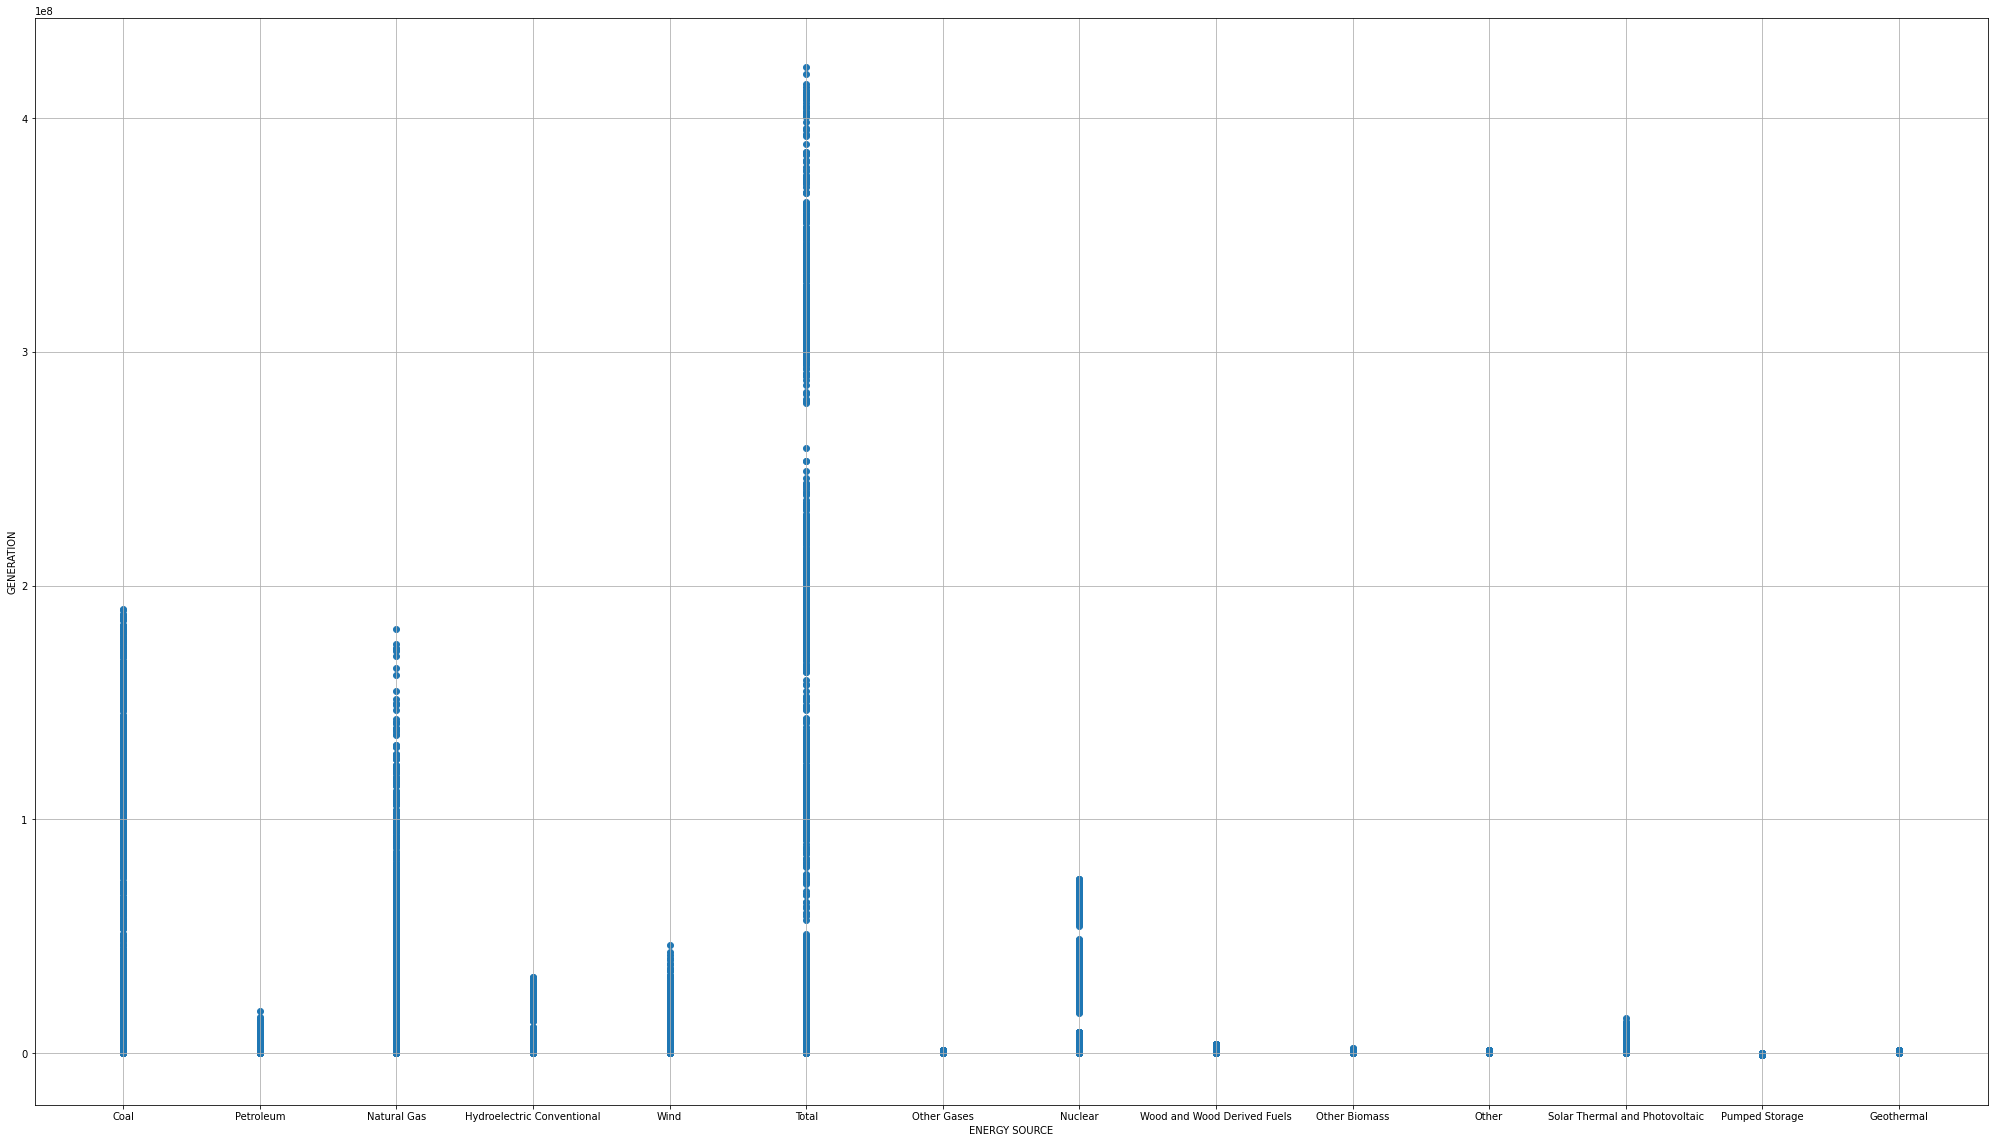

In [9]:


plt.figure(figsize=(35,20))
plt.scatter(energia_df['ENERGY SOURCE'] ,energia_df['GENERATION'])
plt.grid()
plt.xlabel('ENERGY SOURCE')
plt.ylabel('GENERATION')


In [10]:
gas = energia_df[energia_df['ENERGY SOURCE'] == 'Natural Gas']['GENERATION']
gas.value_counts().sum()
gas.shape




66684

(66684,)

### Hipótesis la producción de gas natural es mayor que la de carbón 

In [11]:
print("----------median----------")
stats.median_test(carbon,gas, ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("----------Kruskal----------")
stats.kruskal(carbon,gas)

----------median----------


(81676.12384379595,
 0.0,
 1640.5,
 array([[    0, 57163],
        [47642,  9521]], dtype=int64))

----------Kruskal----------


KruskalResult(statistic=76868.84624297314, pvalue=0.0)

Se puede observar que en este caso las muestras varían de forma significativa por lo que no podemos decir que la producion de gas es mayor que la de carbón

In [12]:
stats.median_test?

Signature:
stats.median_test(
    *args,
    ties='below',
    correction=True,
    lambda_=1,
    nan_policy='propagate',
)
Docstring:
Perform a Mood's median test.

Test that two or more samples come from populations with the same median.

Let ``n = len(args)`` be the number of samples.  The "grand median" of
all the data is computed, and a contingency table is formed by
classifying the values in each sample as being above or below the grand
median.  The contingency table, along with `correction` and `lambda_`,
are passed to `scipy.stats.chi2_contingency` to compute the test statistic
and p-value.

Parameters
----------
sample1, sample2, ... : array_like
    The set of samples.  There must be at least two samples.
    Each sample must be a one-dimensional sequence containing at least
    one value.  The samples are not required to have the same length.
ties : str, optional
    Determines how values equal to the grand median are classified in
    the contingency table.  The string mus

## Se obtienen nuevas muestras para hacer calculos estadisticos sobre las fuentes de generación de energía

In [13]:
nuclear = energia_df[energia_df['ENERGY SOURCE'] == 'Nuclear']['GENERATION']
nuclear.value_counts().sum()
nuclear.shape

wind = energia_df[energia_df['ENERGY SOURCE'] == 'Wind']['GENERATION']
wind.value_counts().sum()
wind.shape

hyd_ele_con = energia_df[energia_df['ENERGY SOURCE'] == 'Hydroelectric Conventional']['GENERATION']
hyd_ele_con.value_counts().sum()
hyd_ele_con.shape

pretoleum = energia_df[energia_df['ENERGY SOURCE'] == 'Petroleum']['GENERATION']
pretoleum.value_counts().sum()
pretoleum.shape


Solar_Thermal_and_Photovoltaic = energia_df[energia_df['ENERGY SOURCE'] == 'Solar Thermal and Photovoltaic']['GENERATION']
Solar_Thermal_and_Photovoltaic.value_counts().sum()
Solar_Thermal_and_Photovoltaic.shape

Geothermal = energia_df[energia_df['ENERGY SOURCE'] == 'Geothermal']['GENERATION']
Geothermal.value_counts().sum()
Geothermal.shape

Other_Biomass = energia_df[energia_df['ENERGY SOURCE'] == 'Other Biomass']['GENERATION']
Other_Biomass.value_counts().sum()
Other_Biomass.shape


renovables = pd.concat([wind,hyd_ele_con,Solar_Thermal_and_Photovoltaic,Geothermal,Other_Biomass], axis=0)
renovables.value_counts().sum()
renovables.shape


16754

(16754,)

25421

(25421,)

38842

(38842,)

63176

(63176,)

19393

(19393,)

4242

(4242,)

46148

(46148,)

134046

(134046,)

## Hipótesis la producción de energía eólica es mayor que la producción de energía hidroeléctrica convencional

In [14]:
print("----------median----------")
stats.median_test(wind,hyd_ele_con, ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("----------Kruskal----------")
stats.kruskal(wind,hyd_ele_con)

----------median----------


(53.375732839953415,
 2.754789255227869e-13,
 53730.0,
 array([[12257, 19874],
        [13164, 18968]], dtype=int64))

----------Kruskal----------


KruskalResult(statistic=30.50856364556381, pvalue=3.3239599696001665e-08)

Se acepta la hipoteis nula lo que nos indica que la producion elolica supera a la hidroeléctrica 

## Hipótesis la producción de petróleo es mayor que la producion de la energía solar 

In [15]:
print("----------median----------")
stats.median_test(pretoleum,Solar_Thermal_and_Photovoltaic, ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("----------Kruskal----------")
stats.kruskal(pretoleum,Solar_Thermal_and_Photovoltaic)

----------median----------


(768.2192835879792,
 4.384661631834652e-169,
 1664.0,
 array([[29899, 11385],
        [33277,  8008]], dtype=int64))

----------Kruskal----------


KruskalResult(statistic=2059.537607106532, pvalue=0.0)

En este caso se pude observar que las varianzas entre las poblaciones nos idican a pesar de existir una pequeña difrencia la produccion de petroleo es mayor que la de la energía solar

## Hipótesis la producción combinada de energías renovables supera a la producción de energía nuclear

In [16]:
print("----------median----------")
stats.median_test(renovables,nuclear, ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("----------Kruskal----------")
stats.kruskal(renovables,nuclear)

----------median----------


(17978.557038260198,
 0.0,
 20420.559999999998,
 array([[58841, 16559],
        [75205,   195]], dtype=int64))

----------Kruskal----------


KruskalResult(statistic=36330.64673139434, pvalue=0.0)

En este caso podemos observar como la diferencia entre las dos poblaciones es marcada por lo que la hiposteisis se rechaza concluyendo que la producción de energías renovables no es mayor a la energía nuclear

## Se obtienen nuevas muestras para hacer calculos estadisticos sobre los tipos de productores de energía

<Figure size 2520x1440 with 0 Axes>

Text(0.5, 0, 'TYPE OF PRODUCER')

Text(0, 0.5, 'GENERATION')

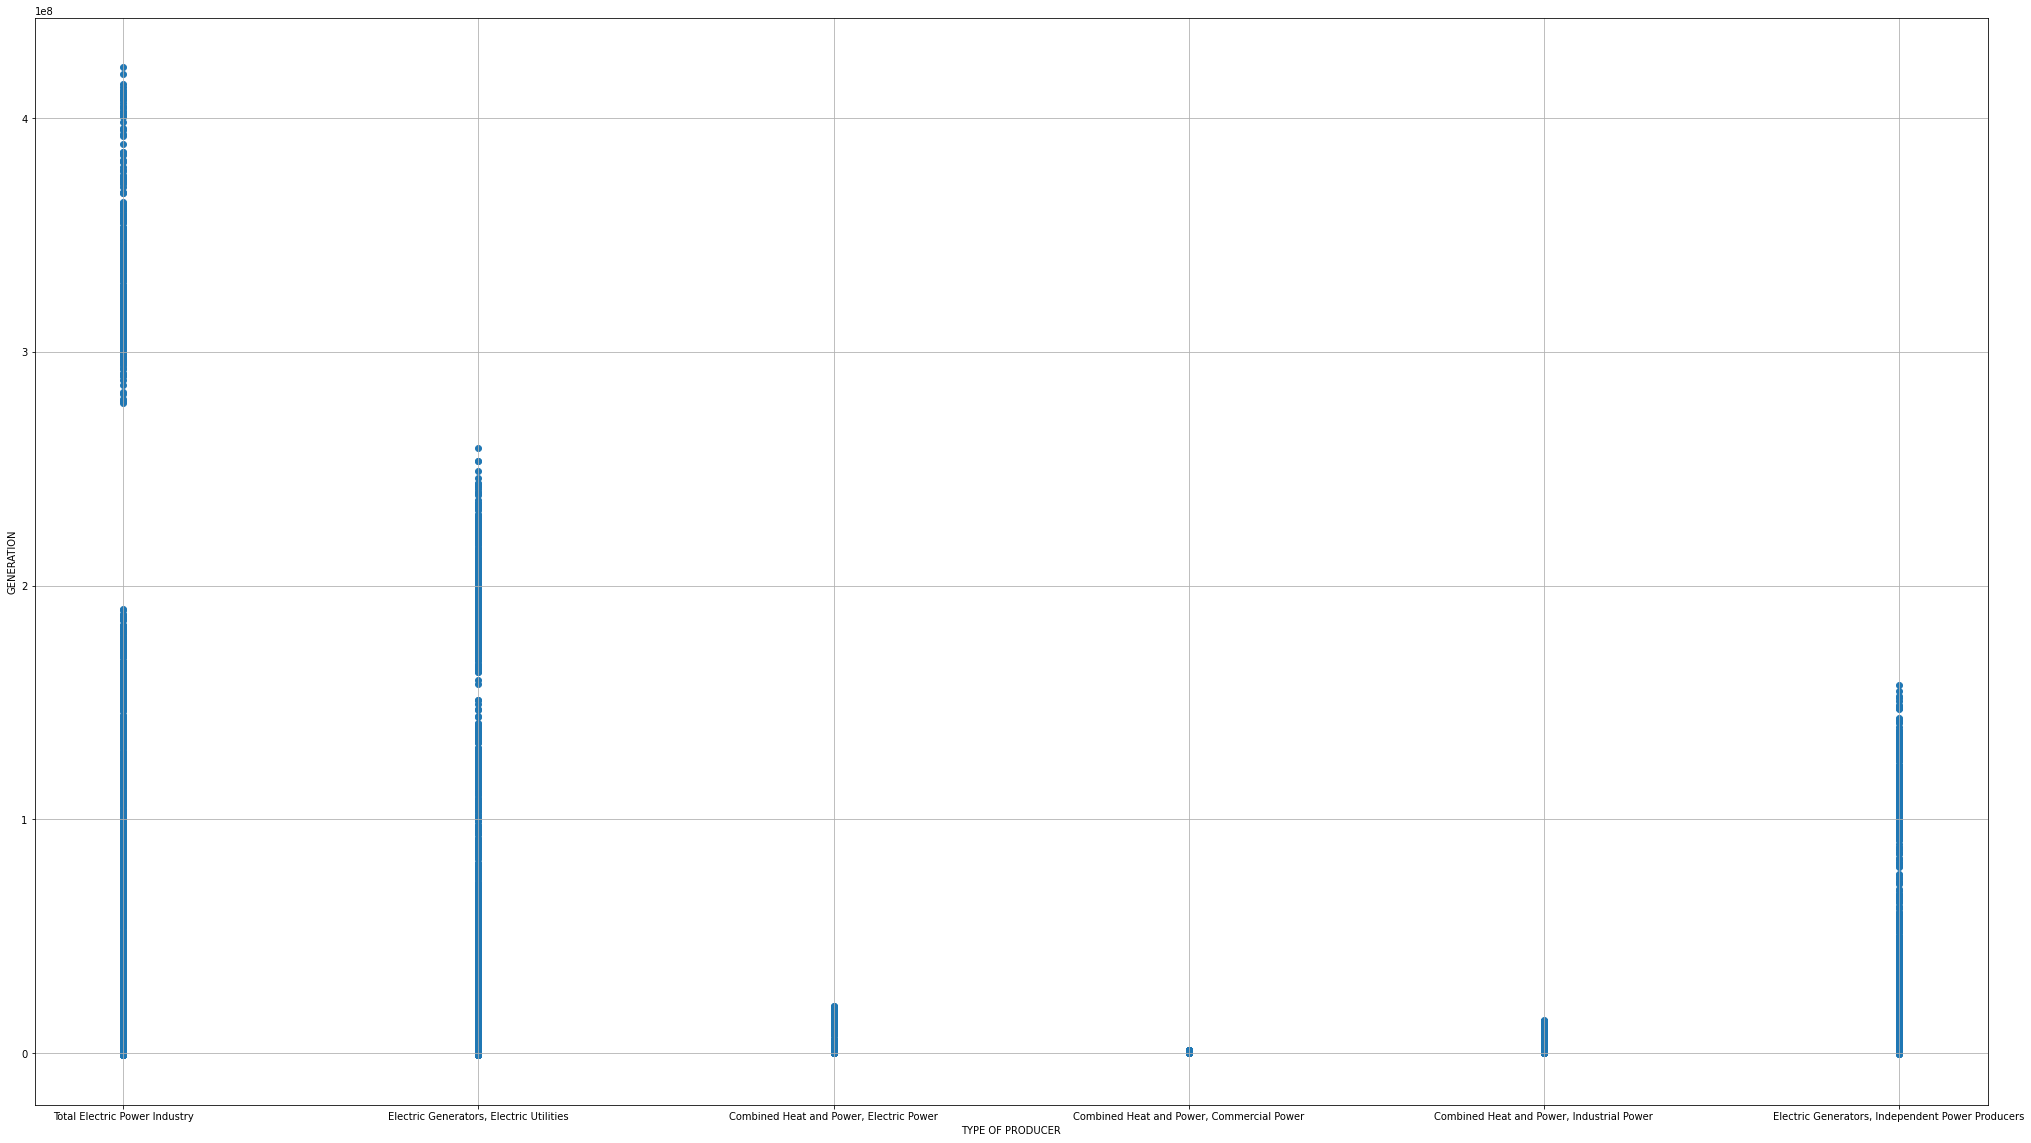

In [20]:
plt.figure(figsize=(35,20))
plt.scatter(energia_df['TYPE OF PRODUCER'] ,energia_df['GENERATION'])
plt.grid()
plt.xlabel('TYPE OF PRODUCER')
plt.ylabel('GENERATION')


In [18]:
Total_Electric_Power_Industry = energia_df[energia_df['TYPE OF PRODUCER'] == 'Total Electric Power Industry']['GENERATION']
Total_Electric_Power_Industry.value_counts().sum()
Total_Electric_Power_Industry.shape

Electric_Generators_Electric_Utilities = energia_df[energia_df['TYPE OF PRODUCER'] == 'Electric Generators, Electric Utilities']['GENERATION']
Electric_Generators_Electric_Utilities.value_counts().sum()
Electric_Generators_Electric_Utilities.shape

Combined_Heat_and_Power_Electric_Power = energia_df[energia_df['TYPE OF PRODUCER'] == 'Combined Heat and Power, Electric Power']['GENERATION']
Combined_Heat_and_Power_Electric_Power.value_counts().sum()
Combined_Heat_and_Power_Electric_Power.shape

Combined_Heat_and_Power_Commercial_Power = energia_df[energia_df['TYPE OF PRODUCER'] == 'Combined Heat and Power, Commercial Power']['GENERATION']
Combined_Heat_and_Power_Commercial_Power.value_counts().sum()
Combined_Heat_and_Power_Commercial_Power.shape

Combined_Heat_and_Power_Industrial_Power = energia_df[energia_df['TYPE OF PRODUCER'] == 'Combined Heat and Power, Industrial Power']['GENERATION']
Combined_Heat_and_Power_Industrial_Power.value_counts().sum()
Combined_Heat_and_Power_Industrial_Power.shape

Electric_Generators_Independent_Power_Producers = energia_df[energia_df['TYPE OF PRODUCER'] == 'Electric Generators, Independent Power Producers']['GENERATION']
Electric_Generators_Independent_Power_Producers.value_counts().sum()
Electric_Generators_Independent_Power_Producers.shape






134452

(134452,)

93792

(93792,)

47359

(47359,)

53928

(53928,)

77804

(77804,)

89439

(89439,)

## Hipótesis la producción de energía calórica comercial es igual a la producción de energía calórica industrial

In [22]:
print("----------median----------")
stats.median_test(Combined_Heat_and_Power_Commercial_Power,Combined_Heat_and_Power_Industrial_Power, ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("----------Kruskal----------")
stats.kruskal(Combined_Heat_and_Power_Commercial_Power,Combined_Heat_and_Power_Industrial_Power)

----------median----------


(7145.517519957812,
 0.0,
 4397.0,
 array([[19420, 46445],
        [34508, 31359]], dtype=int64))

----------Kruskal----------


KruskalResult(statistic=11291.058231116462, pvalue=0.0)

## Hipótesis la producción de energía calórica combinada es igual a la producción total de poder e industria

In [23]:
print("----------median----------")
stats.median_test(Total_Electric_Power_Industry,Combined_Heat_and_Power_Electric_Power, ties='below', correction=True, lambda_=1, nan_policy='propagate')
print("----------Kruskal----------")
stats.kruskal(Total_Electric_Power_Industry,Combined_Heat_and_Power_Electric_Power)

----------median----------


(6687.218213731516,
 0.0,
 53874.0,
 array([[74878, 16027],
        [59574, 31332]], dtype=int64))

----------Kruskal----------


KruskalResult(statistic=10592.88528172845, pvalue=0.0)

Podemos observar clamramente el hecho de que las muestras muestran una disparidad considerable en sus tamaños por lo que no podemos afirmar que sean iguales